Dwse Prwth mera: 1
Dwse Teleutaia mera: 355


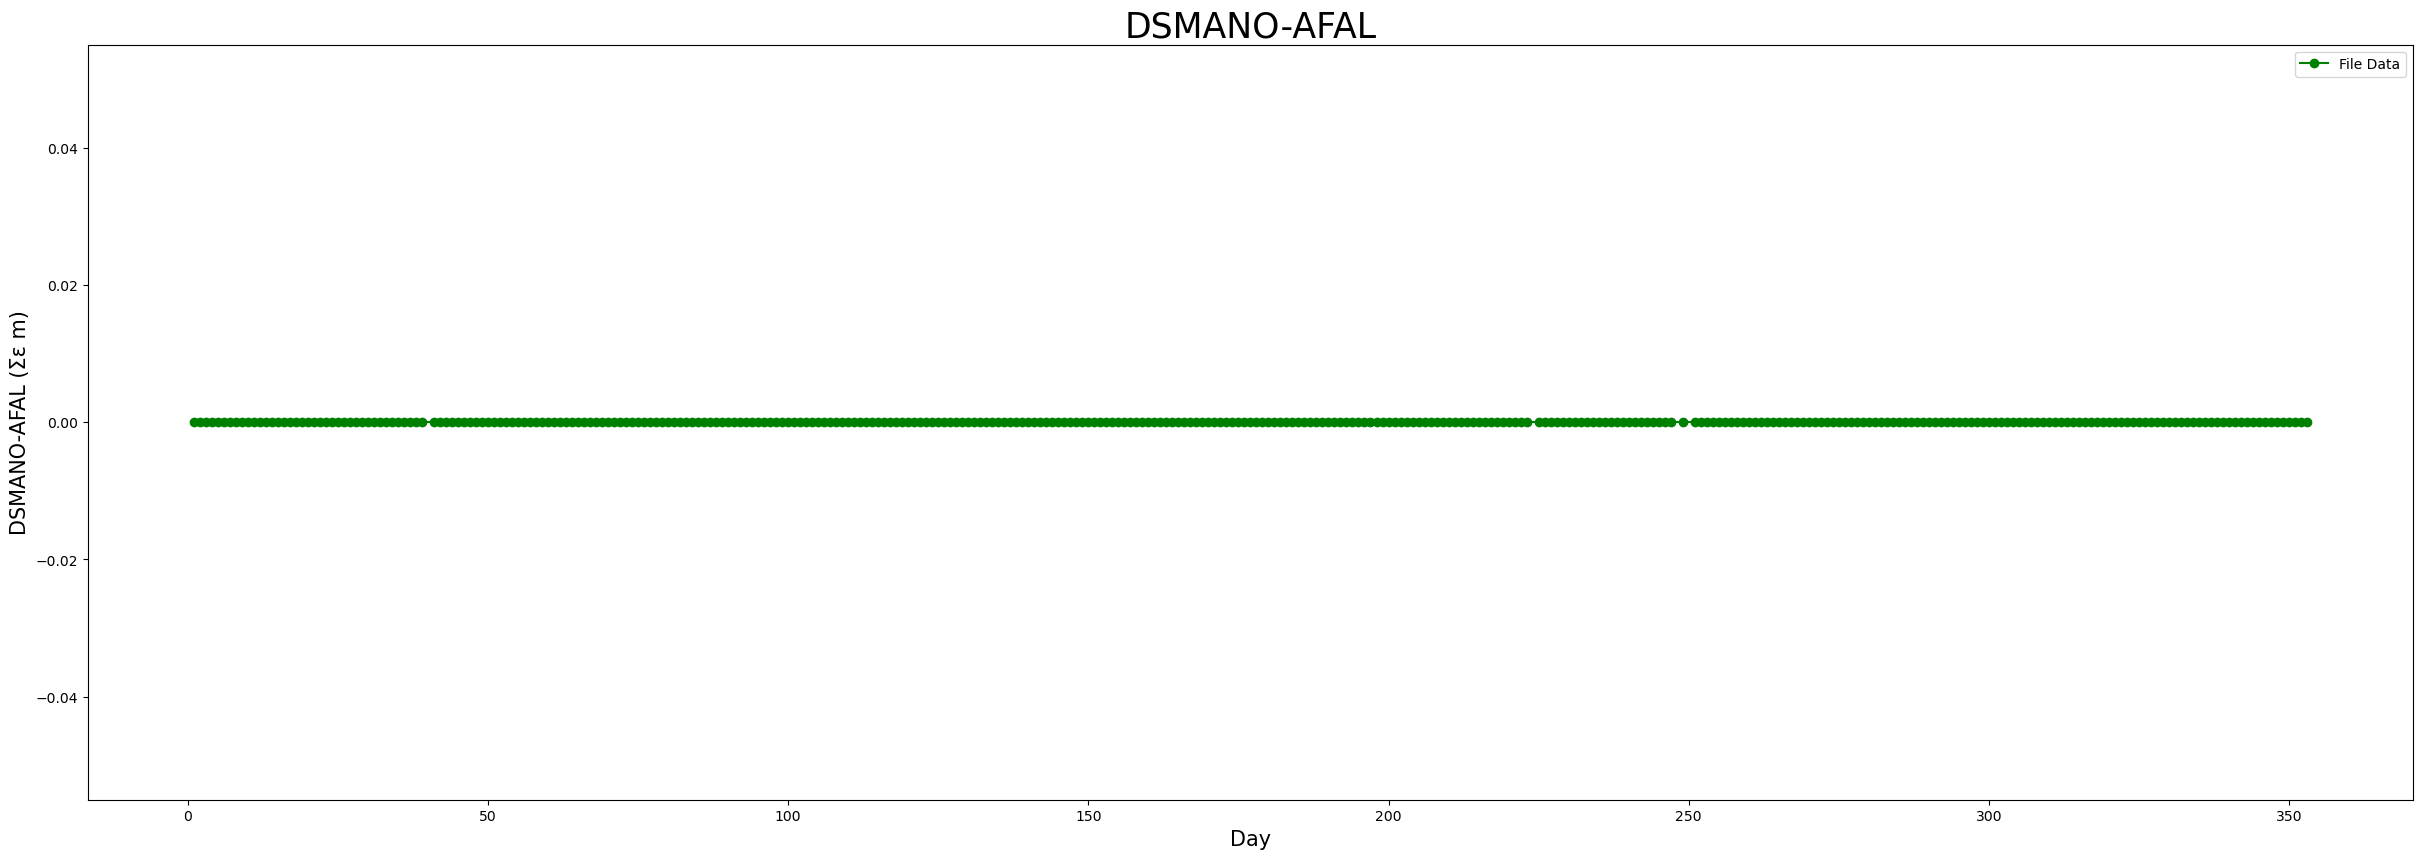

In [13]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from array import *


#year = int(input('Dwse Etos: '))
first_day = int(input('Dwse Prwth mera: '))
last_day = int(input('Dwse Teleutaia mera: '))

if(first_day <= 9):
    #path = f'home/gnss/GPSDATA/MET_BCKP/CAMP/{year}/{first_day}/CRD/W42200{first_day}L.CRD'
    path = f'2022_CRD/W42200{first_day}L.CRD'
elif(first_day <= 99):
    path = f'2022_CRD/W4220{first_day}L.CRD'
else:
    path= f'2022_CRD/W422{first_day}L.CRD'
    

df = pd.read_fwf(path, skiprows=4, skipfooter=5)
        
StationName1 = []
StationName1 = df[df.columns[1]] 

X1 = []
Y1 = []
Z1 = []

AFALX = []
AFALY = []
AFALZ = []

MANOX = []
MANOY = []
MANOZ = []

SANTX = []
SANTY = []
SANTZ = []

SAWIX = []
SAWIY = []
SAWIZ = []

MANO_AFAL = []
MANO_SAWI = []
MANO_SANT = []

DSMANO_AFAL = []
DSMANO_SAWI = []
DSMANO_SANT = []

DateMiss = []
Dates = []

for i in range(first_day,last_day):
       
    
    #path1 = f'{year}/W421{i}L.CRD'
    if(i <= 9):
        path1 = f'2022_CRD/W42200{i}L.CRD'
    elif(i <= 99):
        path1 = f'2022_CRD/W4220{i}L.CRD'
    else:
        path1 = f'2022_CRD/W422{i}L.CRD'
        
    
    isFile1 = os.path.isfile(path1)
    if(isFile1 == False):
        DateMiss.append(i)
    else:
        df1 = pd.read_fwf(path1, skiprows=4, skipfooter=5)  
        Dates.append(i)
        
        X1 = df1[df1.columns[2]] 
        Y1 = df1[df1.columns[3]] 
        Z1 = df1[df1.columns[4]] 
    

        for j in range (0,len(StationName1)):
            if(StationName1[j] == 'AFAL XXXXXXXXX'):
                AFALX.append(X1[j])
                AFALY.append(Y1[j])
                AFALZ.append(Z1[j])
            elif (StationName1[j] == 'MANO XXXXXXXXX'):
                MANOX.append(X1[j])
                MANOY.append(Y1[j])
                MANOZ.append(Z1[j])
            elif (StationName1[j] == 'SANT XXXXXXXXX'):
                SANTX.append(X1[j])
                SANTY.append(Y1[j])
                SANTZ.append(Z1[j])
            elif (StationName1[j] == 'SAWI XXXXXXXXX'):
                SAWIX.append(X1[j])
                SAWIY.append(Y1[j])
                SAWIZ.append(Z1[j])

                
for k in range (0,len(MANOX)):
    MANO_AFAL.append(math.sqrt((MANOX[k] - AFALX[k])**2+(MANOY[k] - AFALY[k])**2+(MANOZ[k] - AFALZ[k])**2))
    MANO_SAWI.append(math.sqrt((MANOX[k] - SAWIX[k])**2+(MANOY[k] - SAWIY[k])**2+(MANOZ[k] - SAWIZ[k])**2))
    MANO_SANT.append(math.sqrt((MANOX[k] - SANTX[k])**2+(MANOY[k] - SANTY[k])**2+(MANOZ[k] - SANTZ[k])**2))



for m in range(0,len(MANO_AFAL)-1):
    if(MANO_AFAL[m] > 1258276 and MANO_AFAL[m] < -1017952):
        #MANO_AFAL.append(math.sqrt((MANOX[k] - AFALX[k])**2+(MANOY[k] - AFALY[k])**2+(MANOZ[k] - AFALZ[k])**2))
        DSMANO_AFAL.append(MANO_AFAL[m+1] - MANO_AFAL[m])
    else:
        DSMANO_AFAL.append(0)
    if(MANO_SAWI[m] > 1258276 and MANO_SAWI[m] < -1017952):
        #MANO_SAWI.append(math.sqrt((MANOX[k] - SAWIX[k])**2+(MANOY[k] - SAWIY[k])**2+(MANOZ[k] - SAWIZ[k])**2))
        DSMANO_SAWI.append(MANO_SAWI[m+1] - MANO_SAWI[m])
    else:
        DSMANO_SAWI.append(0)
    if(MANO_SANT[m] > -1258276 and MANO_SANT[m] < -1017952):
        #MANO_SANT.append(math.sqrt((MANOX[k] - SANTX[k])**2+(MANOY[k] - SANTY[k])**2+(MANOZ[k] - SANTZ[k])**2))
        DSMANO_SANT.append(MANO_SANT[m+1] - MANO_SANT[m])
    else:
        DSMANO_SANT.append(0)


""" 
Date = [] 
with open("DateC.txt", "r") as f:
    date = f.readlines()

Date=date
Date2 = np.arange(len(Date))
""" 

Dates.pop()

figure(figsize=(30, 10), dpi=100)
# plotting the points
plt.plot(Dates, DSMANO_AFAL, 'go-', label = 'File Data')
 
# naming the x axis
plt.xlabel('Day', fontsize = 15)
# naming the y axis
plt.ylabel('DSMANO-AFAL (Σε m)', fontsize = 15)
# giving a title to my graph
plt.title('DSMANO-AFAL' , fontsize = 25)

#plt.xticks(Date2, Date)

plt.legend()
 
# function to show the plot
plt.show()

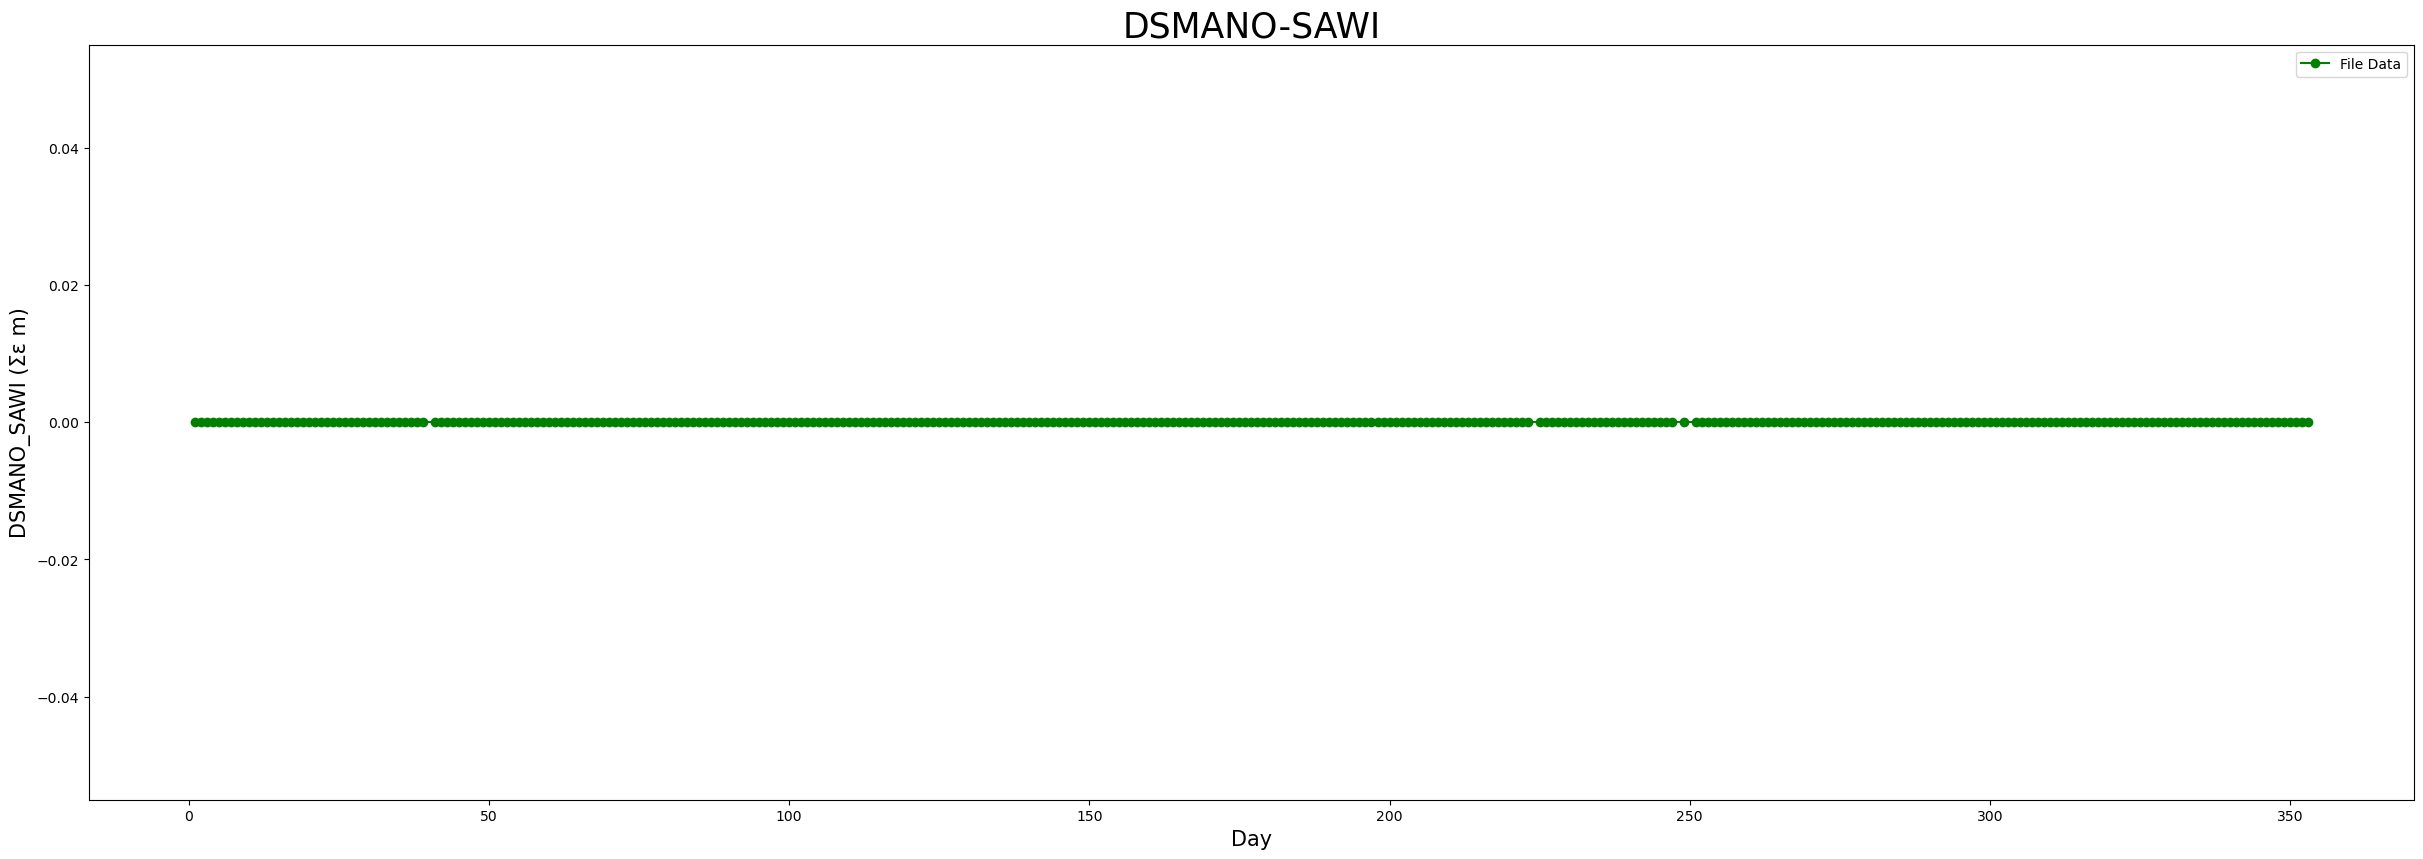

In [14]:
figure(figsize=(30, 10), dpi=100)
# plotting the points
plt.plot(Dates, DSMANO_SAWI, 'go-', label = 'File Data')
 
# naming the x axis
plt.xlabel('Day', fontsize = 15)
# naming the y axis
plt.ylabel('DSMANO_SAWI (Σε m)', fontsize = 15)
# giving a title to my graph
plt.title('DSMANO-SAWI' , fontsize = 25)

#plt.xticks(Date2, Date)

plt.legend()
 
# function to show the plot
plt.show()

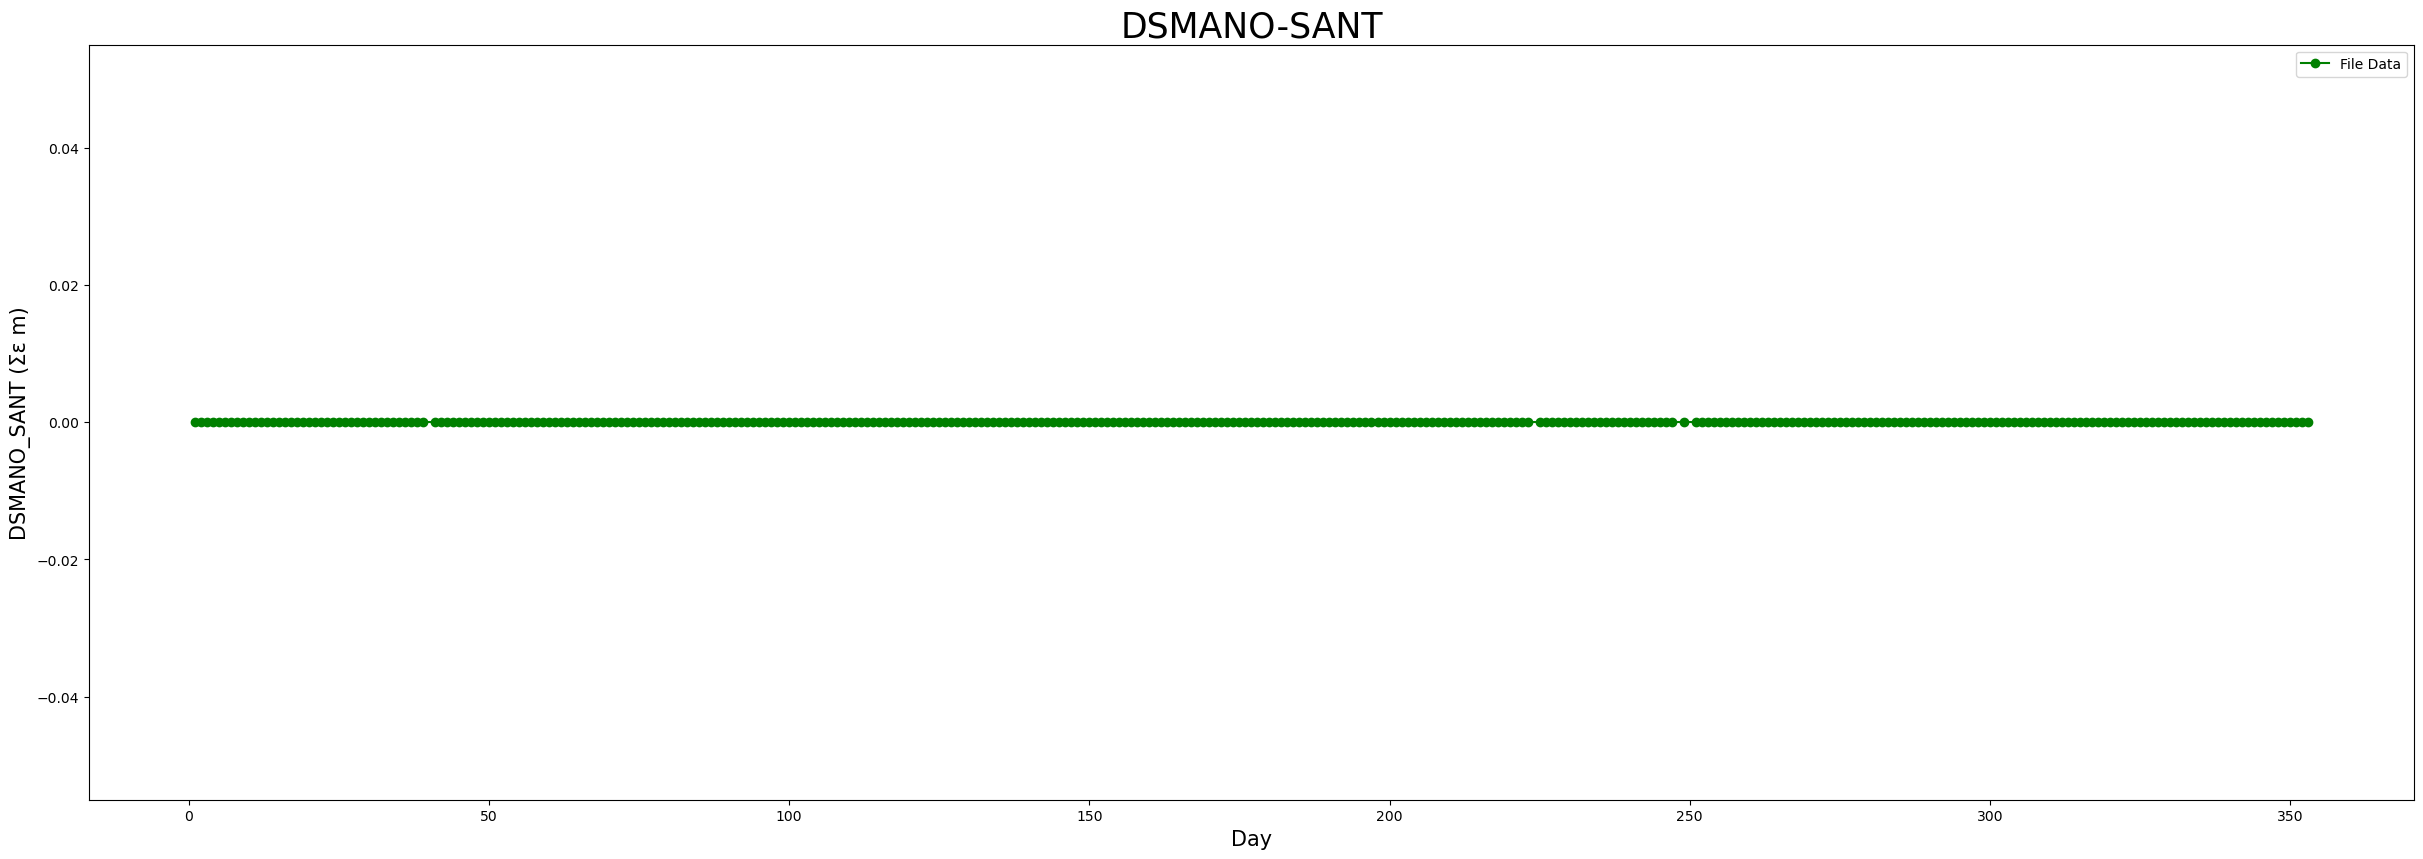

In [15]:
figure(figsize=(30, 10), dpi=100)
# plotting the points
plt.plot(Dates, DSMANO_SANT, 'go-', label = 'File Data')
 
# naming the x axis
plt.xlabel('Day', fontsize = 15)
# naming the y axis
plt.ylabel('DSMANO_SANT (Σε m)', fontsize = 15)
# giving a title to my graph
plt.title('DSMANO-SANT' , fontsize = 25)

#plt.xticks(Date2, Date)

plt.legend()
 
# function to show the plot
plt.show()

In [9]:
MANO_AFAL

[4825.523602993858,
 4825.523518010806,
 4825.52338323518,
 4825.523294231913,
 4825.523439792854,
 4825.523016385553,
 4825.5227031671975,
 4825.522525352011,
 4825.522326064347,
 4825.521916854457,
 4825.5217236003655,
 4825.521471163727,
 4825.520913782489,
 1263101.447787545,
 1263101.445991399,
 1263101.4454664353,
 1263101.443108385,
 1263101.4433491542,
 1263101.4424755012,
 1263101.4434539909,
 1263101.443614293,
 1263101.444739678,
 1263101.4451629028,
 1263101.4465012162,
 1263101.447109402,
 1263101.447253656,
 1263101.4471636526,
 1263101.4486100522,
 1263101.448762775,
 1263101.449688269,
 1263101.4502035792,
 1263101.4492278902,
 1263101.4492275764,
 1263101.449354131,
 1263101.4491358374,
 1263101.4492985134,
 1263101.4483048874,
 1263101.4487745415,
 1263101.4482826919,
 1263101.4480431324,
 1263101.4480847723,
 1263101.4480844962,
 1263101.448561592,
 1263101.449488538,
 1263101.4493393006,
 1263101.4500333364,
 1263101.4494713563,
 1263101.449507266,
 1263101.45027271

In [3]:
DSMANO_AFAL

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.00024076923727989197,
 -0.0008736529853194952,
 0.000978489639237523,
 0.00016030203551054,
 0.0011253850534558296,
 0.000423224875703454,
 0.0013383133336901665,
 0.0006081857718527317,
 0.00014425418339669704,
 -9.000347927212715e-05,
 0.0014463996049016714,
 0.0001527226995676756,
 0.0009254941251128912,
 0.0005153100937604904,
 -0.0009756889194250107,
 -3.1385570764541626e-07,
 0.00012655463069677353,
 -0.00021829362958669662,
 0.00016267597675323486,
 -0.0009936259593814611,
 0.00046965410001575947,
 -0.0004918496124446392,
 -0.00023955944925546646,
 4.163989797234535e-05,
 -2.761371433734894e-07,
 0.00047709583304822445,
 0.0009269460570067167,
 -0.00014923745766282082,
 0.0006940357852727175,
 -0.000561980064958334,
 3.590970300137997e-05,
 0.0007654461078345776,
 0.000753563130274415,
 0.0004058321937918663,
 0.00018835999071598053,
 -0.0002151543740183115,
 -0.0002695131115615368,
 -0.0011026840656995773,
 0.00025438028387725353,


[-8.498305214743596e-05,
 -0.00013477562606567517,
 -8.900326702132588e-05,
 0.00014556094174622558,
 -0.00042340730124124093,
 -0.00031321835558628663,
 -0.00017781518636184046,
 -0.00019928766414523125,
 -0.00040920988976722583,
 -0.00019325409175507957,
 1258275.9213847846,
 0.00024076923727989197,
 -0.0008736529853194952,
 0.000978489639237523,
 0.00016030203551054,
 0.0011253850534558296,
 0.000423224875703454,
 0.0013383133336901665,
 0.0006081857718527317,
 0.00014425418339669704,
 -9.000347927212715e-05,
 0.0014463996049016714,
 0.0001527226995676756,
 0.0009254941251128912,
 0.0005153100937604904,
 -0.0009756889194250107,
 -3.1385570764541626e-07,
 0.00012655463069677353,
 -0.00021829362958669662,
 0.00016267597675323486,
 -0.0009936259593814611,
 0.00046965410001575947,
 -0.0004918496124446392,
 -0.00023955944925546646,
 4.163989797234535e-05,
 -2.761371433734894e-07,
 0.00047709583304822445,
 0.0009269460570067167,
 -0.00014923745766282082,
 0.0006940357852727175,
 -0.000561

In [1]:
DSMANO_AFAL

NameError: name 'DSMANO_AFAL' is not defined